![banner](https://learn.responsibly.ai/assets/img/banner.jpg)

# Class 3 - Discrimination & Fairness: Pre-Class Task

In the second class, we will dive into the challenge of fairness of machine learning models.

In this pre-class task, you will develop a simple classification model that takes a short textual biography of a person and returns its occupation. The model doesn't need to be fancy, you can aim for a "baseline" model with basic preprocessing that achieves reasonable accuracy of at least 80% on the test dataset. For example, Linear Regression on Bag of Words should be sufficient, but feel free to explore more powerful model families. We recommend keeping it simple and use the `sklearn` package. Finally, you will store your model so that you will be able to load it into the notebook in class.

Please go through the whole notebook before you start coding. You could plan your work better if you have first an overview of the task.

As usual, if you have any questions, please post them in the `#class-3` channel in Discord or join the office hours.

Let's start!

## Setup

In [1]:
!wget http://stash.responsibly.ai/3-fairness/activity/data.zip -O data.zip -q
!unzip -oq data.zip

In [2]:
import pandas as pd
from IPython.display import display, Markdown

## Dataset

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

The training dataset and the test dataset consists of multiple rows, one for each person, and two columns:
1. `bio` - The biographies as text (i.e., `string`). This is the input to the model.
1. `occupation` - The occupations of each person as text (i.e., `string`). This is the model's output.

In [4]:
train_df.head()

,bio,occupation
0,His research and teaching focus on security s...,professor
1,He is currently associated with Shri Datta Ho...,dentist
2,Dr. Swarthout is an analytical environmental ...,professor
3,His work has appeared in major U.S. and Europ...,photographer
4,"He was born in the year 1977 in Rajshahi, hea...",photographer


In [5]:
test_df.head()

,bio,occupation
0,"He has worked at the University of Valencia, ...",attorney
1,"Nick Romano is his client, a young man with a...",attorney
2,"In this position, he has written several best...",physician
3,His research focuses on using traditional and...,professor
4,His music to the period supernatural film The...,composer


We used 75%-25% split between the training and the test dataset:

In [6]:
print(f'# train: {len(train_df)}')
print(f'# test: {len(test_df)}')

# train: 280470
# test: 93492


There are 28 occupations:

In [7]:
sorted(train_df['occupation'].unique())

['accountant',
 'architect',
 'attorney',
 'chiropractor',
 'comedian',
 'composer',
 'dentist',
 'dietitian',
 'dj',
 'filmmaker',
 'interior_designer',
 'journalist',
 'model',
 'nurse',
 'painter',
 'paralegal',
 'pastor',
 'personal_trainer',
 'photographer',
 'physician',
 'poet',
 'professor',
 'psychologist',
 'rapper',
 'software_engineer',
 'surgeon',
 'teacher',
 'yoga_teacher']

Each running of the next cell will sample 10 random rows and show their occupations and biographies:

In [8]:
for _, row in train_df.sample(10).iterrows():
    display(Markdown('### Ground-Truth Occupation: ' + row['occupation']))
    display(Markdown(row['bio']))

### Ground-Truth Occupation: professor

 She is currently involved in studies for infant behavioral and neurological developments. She contributes over broad topics ranging behavioral science, psychological science, cognitive science, developmental science, and neuroscience.

### Ground-Truth Occupation: attorney

 He was a defense lawyer that represented Ford Motor Company early in his career. He has the knowledge and experience to represent persons injured by auto defects including crushed roofs, defective tires, seat belts and airbags. As a lifelong sailor, sailing the Atlantic and Pacific Oceans, the San Francisco Bay, the Delta waterways and Lake Tahoe he is experienced in boat accident cases.

### Ground-Truth Occupation: painter

 Combining text and image, these figuative works follow in the tradition of such Russian masters as Kandinsky, Malevich, and others. Bruskin is represented by the Marlborough Gallery in New York, wher... more »e he now lives and works. « less

### Ground-Truth Occupation: journalist

 Chosen Journalist of the Year in Virginia and honored for his writing by the American Society of Journalists and Authors, he was nominated for a Pulitzer Prize for his seven-part series in the Virginian Pilot examining boom and bust in the southern United States.

### Ground-Truth Occupation: professor

 Benerd School of Education. She earned her master's degree and doctorate in educational psychology at Arizona State University and a bachelor's degree in psychology and religious studies at UC Berkeley. One of her former students, Amy Burns '14, nominated her for the award, noting that Brown is "always going out of her way" to support students and help them find fieldwork and internship placements that match their interests.

### Ground-Truth Occupation: photographer

 His work started as an entertainment and music photographer travelling the world with Canadian bands. Through Northern United States and across Canada twice, he made his way to Europe from Czech Republic to the UK, enjoying the fast track photography lifestyle. Shooting, editing, and posting photos became his life on tour. During this time, Mark also shot landscape, portraits and lifestyle photography capitalizing the array of opportunities and locations while travelling. Mark continues to photograph anything and everything that interests him; product work, architecture, landscape, lifestyle and portraiture. His passion for photography is evident in his dedication and creativity. This site is a small representation of Mark’s growing body of work. Comments, questions and inquires are always welcome.

### Ground-Truth Occupation: architect

 He brings a passion for preservation and sustainability and a deep respect for the region, Lake Michigan and Harbor Country communities. Contact Chris: cbrayak@gowightman.com

### Ground-Truth Occupation: nurse

 Most recently, Linda has earned her Master of Science in Nursing with a concentration in Psychiatry and Mental Health from Virginia Commonwealth University. Linda previously worked as a Registered Nurse working with children and adolescents in the inpatient setting. She enjoys working with patients across the lifespan and specializes in a variety of mental health conditions including depression, anxiety, mood disorders, ADHD, PTSD and Schizophrenia. Linda is fluent in both English and Vietnamese.

### Ground-Truth Occupation: software_engineer

 Mykyta is passionate about all things scalable, from coding to deploying to monitoring. He has solid experience building high-performance backends for a variety of applications at leading Silicon Valley companies, including top-rated social mobile games and billing platforms. Mykyta is the author of Henka, a Gradle plugin for Terraform. He’s an occasional speaker at conferences such as Devoxx Belgium, JavaDay Kyiv, and Gradle Summit.

### Ground-Truth Occupation: software_engineer

 A well-known columnist, book author, and VB guru, Rod has been an instructor at MIT and a senior member of the technical staff at GTE Laboratories, where he built several award-winning computer systems. His other books from Wiley include Visual Basic Graphics Programming, Ready-to-Run Visual Basic Algorithms, and Custom Controls Library.

## Your turn!

### Training

Train a model on the training dataset and ensure that your model achieves at least 80% accuracy on the test dataset. Please use the variable name `model` to hold your model object (e.g., sklearn's LogisticRegression, PyTorch model, ...).

In [9]:
# traning Prep
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer()
tfidf = TfidfTransformer()

x_train, x_test = train_df['bio'], test_df['bio']
y_train, y_test = train_df['occupation'], test_df['occupation']

x_train_tfidf = tfidf.fit_transform(vectorizer.fit_transform(x_train))
x_test_tfidf = tfidf.transform(vectorizer.transform(x_test))

In [10]:
# Model
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='squared_hinge', random_state=3)
model.fit(x_train_tfidf, y_train)

SGDClassifier(loss='squared_hinge', random_state=3)

### Evaluation I

Show the accuracy of the model on the test dataset:

Train accuracy: 85.11%
Test accuracy: 81.90%


[Text(30.5, 0.5, 'true label'),
 Text(0.5, 12.5, 'predicted label'),
 Text(0.5, 1.0, 'Test set confusion matrix')]

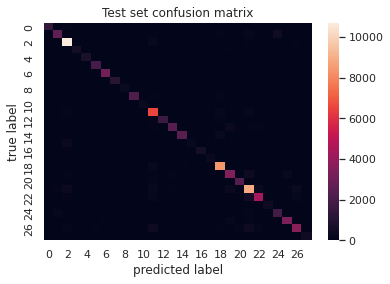

In [11]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred = model.predict(x_train_tfidf)
y_test_pred = model.predict(x_test_tfidf)

print(f'Train accuracy: {accuracy_score(y_pred=y_train_pred, y_true=y_train) * 100:.2f}%')
print(f'Test accuracy: {accuracy_score(y_pred=y_test_pred, y_true=y_test) * 100:.2f}%')

sns.heatmap(confusion_matrix(y_pred=y_test_pred, y_true=y_test), annot=False, fmt='d').set(
    title='Test set confusion matrix', xlabel='predicted label', ylabel='true label')

### `predict` function

Implement the function `predict`, that returns predictions to a sequence of bios given as list/pandas series of strings. You will need to use this function in class.

In [12]:
def predict(bios):
  bios_tfidf = tfidf.transform(vectorizer.transform(bios))
  pred = model.predict(bios_tfidf)
  return pred

Demonstrate that your `predict` function works, **show the inputs and the predicted output** of a few examples:

In [20]:
# using predict function
partialTestBios = x_test.head(30)
partialTestOccupations = y_test.head(30)

responses = predict(partialTestBios)
for idx in range(0,30):
  print("Input:", partialTestBios[idx])
  print("Expected Output:", partialTestOccupations[idx])
  print("Actual Output:", responses[idx])



Input:  He has worked at the University of Valencia, at the European Commission’s Anti-Fraud Office in Brussels, and the Legal Department of the International Monetary Fund’s Financial Integrity Group, and most recently at the Inter-American Development Bank, both in Washington, D.C. He currently works at the Fiscal Department of Uría Menéndez Abogados, S.L.P in Barcelona (Spain). He may be contacted at alberto.gil@uria.com. Contributions include chapter 1: Background and Current Status of FATCA, chapter 15: Framework of Intergovernmental Agreements, chapter 18: The OECD Role in Exchange of Information: the Trace Project, FATCA, and Beyond, and chapter 28: Exchange of Tax Information and the Impact of FATCA for Spain.
Expected Output: attorney
Actual Output: attorney
Input:  Nick Romano is his client, a young man with a long string of crimes behind him. Romano, after turning to robbery again, is caught by a cop and Nick pumps all his bullets into him in frustration. Morton's appeal to 

### Evaluation II

Show the accuracy-per-class on the test dataset:

In [14]:
# evaluation code 2
classes = sorted(train_df['occupation'].unique())

for classs in classes:
  dataSet = test_df[test_df['occupation'] == classs]
  x_class_test = dataSet['bio']
  y_class_test = dataSet['occupation']

  predictions = predict(x_class_test)
  print(f'Class Accuracy for {classs}: {accuracy_score(y_pred=predictions, y_true=y_class_test) * 100:.2f}%')

Class Accuracy for accountant: 77.68%
Class Accuracy for architect: 72.28%
Class Accuracy for attorney: 93.16%
Class Accuracy for chiropractor: 69.31%
Class Accuracy for comedian: 77.14%
Class Accuracy for composer: 90.64%
Class Accuracy for dentist: 94.74%
Class Accuracy for dietitian: 84.81%
Class Accuracy for dj: 68.97%
Class Accuracy for filmmaker: 83.37%
Class Accuracy for interior_designer: 62.41%
Class Accuracy for journalist: 86.67%
Class Accuracy for model: 76.52%
Class Accuracy for nurse: 69.96%
Class Accuracy for painter: 85.31%
Class Accuracy for paralegal: 38.63%
Class Accuracy for pastor: 67.01%
Class Accuracy for personal_trainer: 68.24%
Class Accuracy for photographer: 92.34%
Class Accuracy for physician: 73.76%
Class Accuracy for poet: 81.50%
Class Accuracy for professor: 79.40%
Class Accuracy for psychologist: 77.91%
Class Accuracy for rapper: 78.15%
Class Accuracy for software_engineer: 77.02%
Class Accuracy for surgeon: 84.76%
Class Accuracy for teacher: 68.55%
Clas

### Evaluation III

Now, show the **Positive Rate**, **False Positive Rate** and **False Negative Rate** of each occupation.

Bonus: use the Seaborn's `PairPlot` + dot plot to plot it [demo](https://seaborn.pydata.org/examples/pairgrid_dotplot.html).

In [15]:
# evaluation code 3
dataSetTwo = test_df
x_dataSetTwo = dataSetTwo['bio']
y_dataSetTwo = dataSetTwo['occupation']
z_dataSetTwo = predict(x_dataSetTwo).tolist()
dataSetTwo['prediction'] = z_dataSetTwo

In [17]:
for classs in classes:
  classSetFromOcc = dataSetTwo[dataSetTwo['occupation'] == classs]
  classSetFromPred = dataSetTwo[dataSetTwo['prediction'] == classs]

  dsWithRightOccAndPred = dataSetTwo[(dataSetTwo['occupation'] == classs) & (dataSetTwo['prediction'] == classs)]
  dsWithRightOccAndWrongPred = dataSetTwo[(dataSetTwo['occupation'] == classs) & (dataSetTwo['prediction'] != classs)]

  dsWithWrongOccAndRightPred = dataSetTwo[(dataSetTwo['occupation'] != classs) & (dataSetTwo['prediction'] == classs)]

  print(f'=====[ {classs} ]=====')
  print(f'True Positive Rate for {classs}: {(len(dsWithRightOccAndPred) / len(classSetFromOcc)) * 100:.2f}%')
  print(f'False Negative Rate for {classs}: {(len(dsWithRightOccAndWrongPred) / len(classSetFromOcc)) * 100:.2f}%')
  print(f'False Positive Rate for {classs}: {(len(dsWithWrongOccAndRightPred) / len(classSetFromPred)) * 100:.2f}%')
  print(f'=====[ {classs} ]=====')
  print()
  print()
  print()

=====[ accountant ]=====
True Positive Rate for accountant: 77.68%
False Negative Rate for accountant: 22.32%
False Positive Rate for accountant: 11.69%
=====[ accountant ]=====



=====[ architect ]=====
True Positive Rate for architect: 72.28%
False Negative Rate for architect: 27.72%
False Positive Rate for architect: 18.32%
=====[ architect ]=====



=====[ attorney ]=====
True Positive Rate for attorney: 93.16%
False Negative Rate for attorney: 6.84%
False Positive Rate for attorney: 13.86%
=====[ attorney ]=====



=====[ chiropractor ]=====
True Positive Rate for chiropractor: 69.31%
False Negative Rate for chiropractor: 30.69%
False Positive Rate for chiropractor: 7.94%
=====[ chiropractor ]=====



=====[ comedian ]=====
True Positive Rate for comedian: 77.14%
False Negative Rate for comedian: 22.86%
False Positive Rate for comedian: 11.05%
=====[ comedian ]=====



=====[ composer ]=====
True Positive Rate for composer: 90.64%
False Negative Rate for composer: 9.36%
False Pos

## That's all!

1. If you found a mistake / problem in this notebook, or something was unclear, please post your question in the **`#class-3`** channel in our Discord server.

2. Make sure that you save this notebook (In Colab: File > Download > Download .ipynb)

3. Prepare to explain to your team what you did briefly and demonstrate a few pairs of input-output examples (using the `predict` function). Be mindful of the background of your teammates.

4. Submit your the notebook via Gradescope: https://go.responsibly.ai/gradescope